# Video Game Sales Prediction Using Linear Regression & DecisionTree

# Link of dataset

In [1]:
# importing the necessary Python libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read the dataset using pandas library


data = pd.read_csv('vgsales.csv')
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
data.tail()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [4]:
data.shape

(16598, 11)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [6]:
#droping the Null Values
data.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [7]:
data= data.dropna()

In [8]:
data.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [9]:
data.isna().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

## EDA

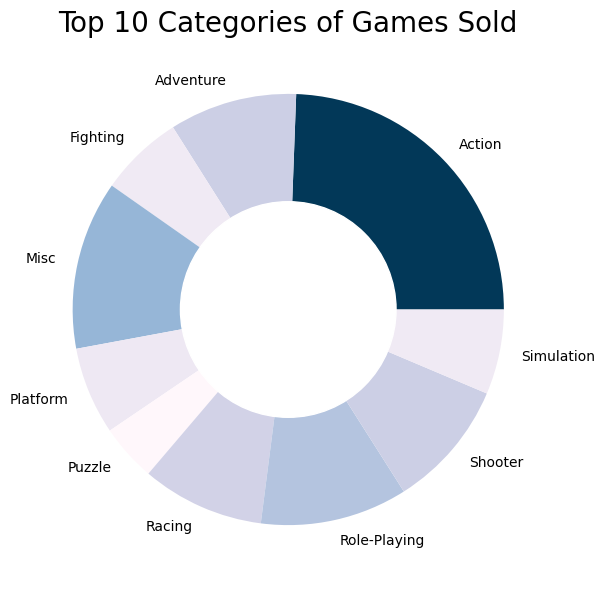

In [10]:
import matplotlib as mpl
game = data.groupby("Genre")["Global_Sales"].count().head(10)
custom_colors = mpl.colors.Normalize(vmin=min(game), vmax=max(game))
colours = [mpl.cm.PuBu(custom_colors(i)) for i in game]
plt.figure(figsize=(7,7))
plt.pie(game, labels=game.index, colors=colours)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Top 10 Categories of Games Sold", fontsize=20)
plt.show()

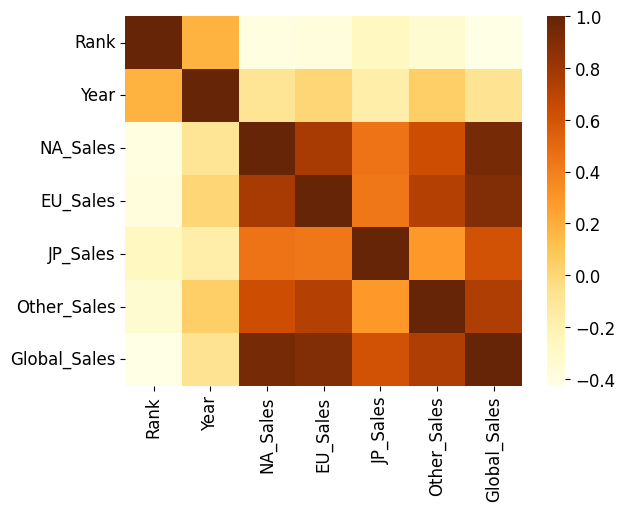

In [11]:
import pandas as pd

# Load the data from the CSV file
data = pd.read_csv('vgsales.csv')

# Drop non-numeric columns
numeric_data = data.drop(columns=['Name','Platform','Genre','Publisher'])

# Compute correlation matrix
correlation_matrix = numeric_data.corr()

# Plot heatmap
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation_matrix, cmap="YlOrBr")
plt.show()


In [12]:
# converting dependent and independent variables


x = data[["Rank", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]]
y = data["Global_Sales"]

In [13]:
#train_test_split 


from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

# Decision Tree

In [14]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(xtrain, ytrain)
predictions = model.predict(xtest)

In [15]:
# predictions
for i, pred in enumerate(predictions):
    print(f"Prediction {i+1}: {pred}")
  

Prediction 1: 0.1499999999999994
Prediction 2: 0.4000000000000002
Prediction 3: 0.019999999999999678
Prediction 4: 0.02999999999999996
Prediction 5: 0.3599999999999997
Prediction 6: 2.25
Prediction 7: 0.3900000000000004
Prediction 8: 0.6499999999999999
Prediction 9: 0.21000000000000052
Prediction 10: 0.44000000000000045
Prediction 11: 0.9600000000000005
Prediction 12: 0.10000000000000056
Prediction 13: 0.07000000000000023
Prediction 14: 0.59
Prediction 15: 0.0799999999999992
Prediction 16: 0.2399999999999996
Prediction 17: 0.12999999999999987
Prediction 18: 0.02999999999999996
Prediction 19: 0.10999999999999985
Prediction 20: 0.0799999999999992
Prediction 21: 3.32
Prediction 22: 0.17000000000000084
Prediction 23: 0.05000000000000044
Prediction 24: 3.76
Prediction 25: 0.6000000000000004
Prediction 26: 0.05000000000000044
Prediction 27: 0.2700000000000002
Prediction 28: 1.5500000000000003
Prediction 29: 0.03999999999999949
Prediction 30: 1.5
Prediction 31: 0.019999999999999678
Prediction

# Linear Regression

In [16]:


from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain, ytrain)
predictions = model.predict(xtest)


In [17]:
for i, pred in enumerate(predictions):
    print(f"Prediction {i+1}: {pred}")

Prediction 1: 0.15035323669297898
Prediction 2: 0.4100124372461932
Prediction 3: 0.020898891537508943
Prediction 4: 0.020838946939744647
Prediction 5: 0.360043407928198
Prediction 6: 2.2497314100771124
Prediction 7: 0.4000299637470478
Prediction 8: 0.6498747794946272
Prediction 9: 0.2102433541301736
Prediction 10: 0.440036730680993
Prediction 11: 0.9598313833577027
Prediction 12: 0.09050664388025031
Prediction 13: 0.07063594959296025
Prediction 14: 0.5799080454007641
Prediction 15: 0.08057652973413262
Prediction 16: 0.23019764512173996
Prediction 17: 0.13041357228788458
Prediction 18: 0.03081721451759911
Prediction 19: 0.11048379205810169
Prediction 20: 0.090552217407492
Prediction 21: 3.279587299168205
Prediction 22: 0.17031819437091933
Prediction 23: 0.0506908700529096
Prediction 24: 3.7696617050545473
Prediction 25: 0.5999395986523743
Prediction 26: 0.0506848491272157
Prediction 27: 0.27016044878624135
Prediction 28: 1.5397225403251502
Prediction 29: 0.040759399112102926
Prediction 

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(ytest, predictions)

mse = mean_squared_error(ytest, predictions)

rmse = mean_squared_error(ytest, predictions, squared=False)

r2 = r2_score(ytest, predictions)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 0.0030092995609963865
Mean Squared Error (MSE): 2.7270465951800725e-05
Root Mean Squared Error (RMSE): 0.005222113169187424
R-squared (R2): 0.999993509139864


c:\Users\afora\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [25]:
# Load the data from the CSV file
data = pd.read_csv('vgsales.csv')

# Define test case
test_case = {
    "Rank": 200,        # Example rank
    # "Year": 2010,       # Example year
    "NA_Sales": 8.0,    # Example NA sales
    "EU_Sales": 3.0,    # Example EU sales
    "JP_Sales": 1.0,    # Example JP sales
    "Other_Sales": 0.5  # Example other sales
}

test_df = pd.DataFrame(test_case, index=[0])

if "Year" not in data.columns:
    test_df["Year"] = 0

test_prediction = model.predict(test_df)

print("Predicted Global Sales:", test_prediction[0])


Predicted Global Sales: 7.31
